In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation

## GP prior

In [36]:
xs = np.linspace(-2,2,50)

# GP parameters
mus = np.zeros_like(xs)
sigma = .1
ls = .3

In [37]:
def sq_exp_kernel(x1, x2, sigma, ls):
    """Squared exponential kernel (matrix version)."""
    sqdist = (x1 - x2)**2
    return sigma**2 * np.exp(-0.5 * sqdist / ls**2)

def gen_cov_matrix(xs1, xs2, sigma, ls):
    d1 = len(xs1)
    d2 = len(xs2)

    K = np.zeros((d1, d2))
    for i in range(d1):
        for j in range(d2):
            K[i,j] = sq_exp_kernel(xs1[i], xs2[j], sigma, ls)
            if i == j:
                K[i,j] += 1e-6
    return K

Text(0.5, 1.0, 'GP prior')

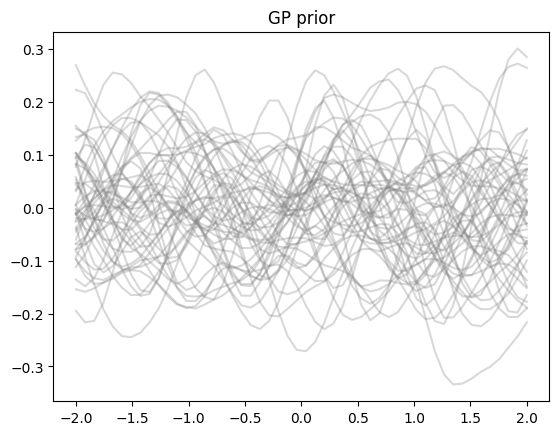

In [41]:
np.random.seed(1002)
Cov = gen_cov_matrix(xs, xs, sigma, ls)
L = np.linalg.cholesky(Cov)
for _ in range(50):
    ys = mus + L.dot(np.random.randn(*mus.shape))
    plt.plot(xs, ys, color = 'grey', alpha = .3)
plt.title('GP prior')

## GP Posterior

In [42]:
def get_gp_posterior(x_obs, y_obs, x_star, ls, sigma):
    K = gen_cov_matrix(x_obs, x_obs, sigma, ls)
    K_s = gen_cov_matrix(x_obs, x_star, sigma, ls)
    K_ss = gen_cov_matrix(x_star, x_star, sigma, ls)

    K_inv = np.linalg.inv(K)

    mu_post = K_s.T @ K_inv @ y_obs
   
    cov_post = K_ss - K_s.T @ K_inv @ K_s

    return mu_post, cov_post

Text(0.5, 1.0, 'GP posterior')

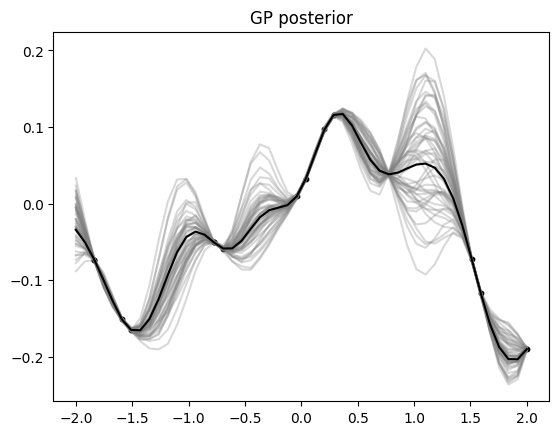

In [43]:
num_obs = 15
idx_obs = np.random.randint(0, len(xs), num_obs)
xs_obs = xs[idx_obs]
ys_obs = ys[idx_obs]

mu_post, Cov_post = get_gp_posterior(xs_obs, ys_obs, xs, ls, sigma)
L_post = np.linalg.cholesky(Cov_post)

for _ in range(50):
    ys = mu_post + L_post.dot(np.random.randn(*mus.shape))
    plt.plot(xs, ys, color = 'grey', alpha = .3)
plt.scatter(xs_obs, ys_obs, color = 'black', s = 10)
plt.plot(xs, mu_post, color = 'black' )

plt.title('GP posterior')
